In [37]:
import pandas as pd 
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from pingouin import power_anova 
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..', '..', 'src'))
from visualization import plot_freezing_time


In [38]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..', '..', 'src'))
print(os.path.join(os.getcwd(), '..', '..', 'src'))


/Users/novak/Documents/Columbia/mentored_research/Turi/els git/els_project/notebooks/novak_analyses/../../src


In [39]:
#data prep 

data = pd.read_csv('PTSD_filtered.csv')

## to create a varaible for age at sefla and consequently create a binary varaiable for young or not
data['dob'] = pd.to_datetime(data['dob'])
data['date'] = pd.to_datetime(data['date'])
data['age_at_sefla'] = None

for idx, row in data.iterrows():
    if row['day'] == 'sefla':
        data.at[idx, 'age_at_sefla'] = (row['date'] - row['dob']).days / 7
    else:
        sefla_row = data[(data['cohort_id'] == row['cohort_id']) & (data['day'] == 'sefla')]
        if not sefla_row.empty:
            data.at[idx, 'age_at_sefla'] = sefla_row.iloc[0]['age_at_sefla']

data['age_at_sefla'] = data['age_at_sefla'].astype(float)

data['young'] = (data['age_at_sefla'] < 12).astype(str)

## subsetting data
subset_data = data[(data['day'] != 'sefla') & (data['day'] != 'recall5')]
experimental_group = subset_data[subset_data['condition'] == 'sefl']
control_group = subset_data[subset_data['condition'] == 'control']
sefla_data = data[data['day'] == 'sefla']
experimental_group_sefla = data[(data['day'] == 'sefla') & (data['condition'] == 'sefl')]
control_group_sefla = data[(data['day'] == 'sefla') & (data['condition'] == 'control')]
male_data = subset_data[subset_data['sex'] == 'male']
female_data = subset_data[subset_data['sex'] == 'female']
male_data_sefla = data[(data['day'] == 'sefla') & (data['sex'] == 'male')]
female_data_sefla = data[(data['day'] == 'sefla') & (data['sex'] == 'female')]
old_data = subset_data[subset_data['young'] == 'False']
young_data = subset_data[subset_data['young'] == 'True']
old_data_sefla = data[(data['day'] == 'sefla') & (data['young'] == 'False')]
young_data_sefla = data[(data['day'] == 'sefla') & (data['young'] == 'True')]

/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_3276/674333112.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['dob'] = pd.to_datetime(data['dob'])
/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_3276/674333112.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


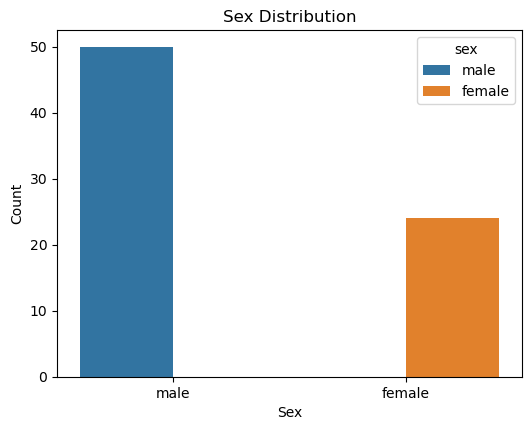

In [40]:
#figure 1a
plt.figure(figsize=(6, 4.5))
sns.countplot(data=data[data['day'] == 'sefla'], x="sex", hue="sex")
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Distribution')
plt.savefig('figure_1a_sex_dist.svg', format='svg')

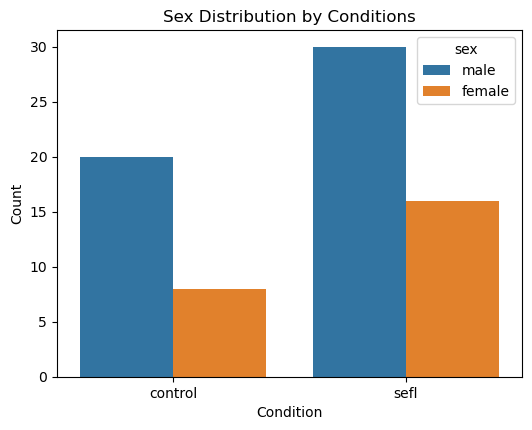

In [41]:
#figure 1b
plt.figure(figsize=(6, 4.5))
sns.countplot(data=data[data['day'] == 'sefla'], x="condition", hue="sex")
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Sex Distribution by Conditions')
plt.savefig('figure_1b_sex_dist_cond.svg', format='svg')

/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


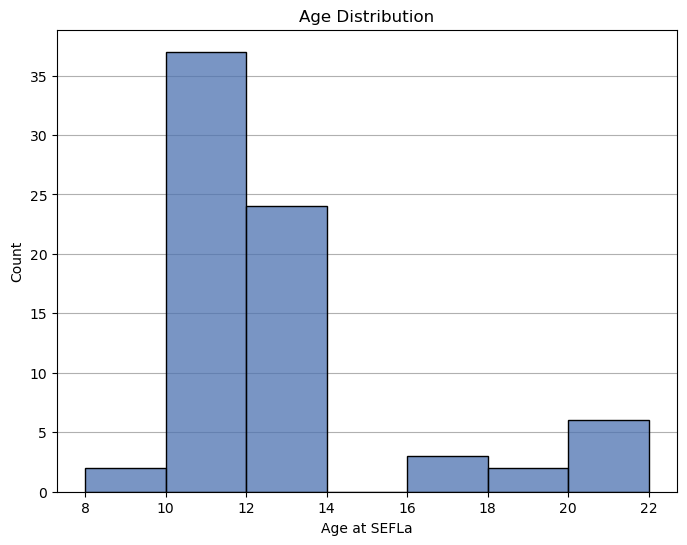

In [42]:
#figure 1c
# Plot the combined histogram and KDE plot
bins = [8, 10, 12, 14, 16, 18, 20, 22]
plt.figure(figsize=(8, 6))
sns.histplot(data[data['day'] == 'sefla']['age_at_sefla'], bins=bins, color="#4c72b0", zorder=2)
plt.xlabel('Age at SEFLa')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.grid(axis='y', linestyle='-', zorder=1)  # Optional: Customize the style of the horizontal line
plt.grid(axis='x', color='none')  # Remove vertical grid lines
plt.savefig('figure_1c_age_hist.svg', format='svg')
plt.show()

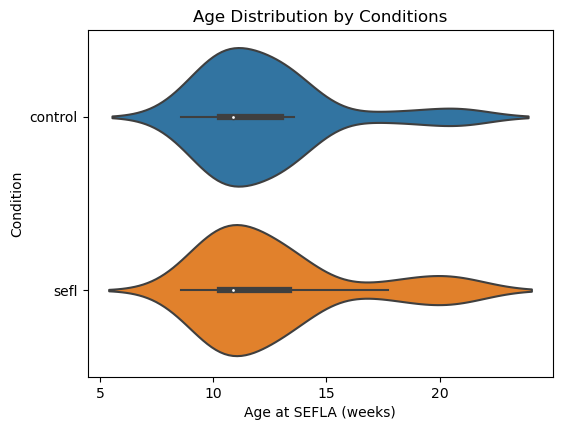

In [43]:
#figure 1d
plt.figure(figsize=(6, 4.5))
sns.violinplot(data=data[data['day'] == 'sefla'], x='age_at_sefla', y='condition')
plt.xlabel('Age at SEFLA (weeks)')
plt.ylabel('Condition')
plt.xticks(ticks=range(5, int(data['age_at_sefla'].max()) + 5, 5))
plt.title('Age Distribution by Conditions')
plt.savefig('figure_1d_age_cond.svg', format='svg')

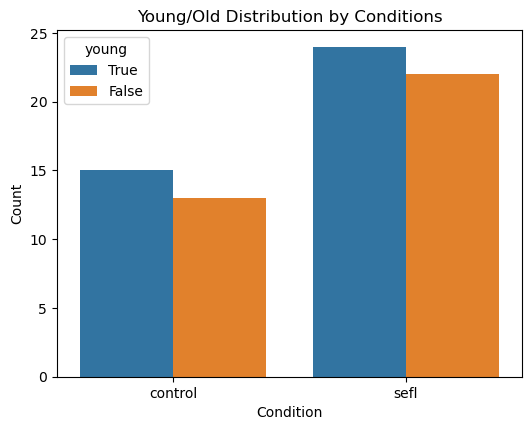

In [44]:
#figure 1e
plt.figure(figsize=(6, 4.5))
sns.countplot(data=data[data['day'] == 'sefla'], x="condition", hue="young")
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Young/Old Distribution by Conditions')
plt.savefig('figure_1e_young_cond.svg', format='svg')

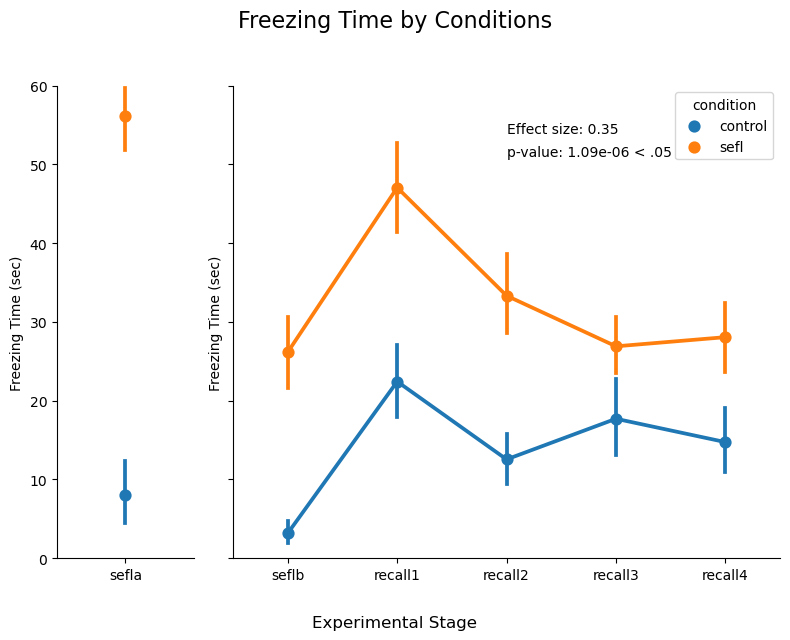

In [61]:
#figure 2a

plot_freezing_time(
    sefla_data=sefla_data,
    subset_data=subset_data,
    effect_size=0.353210,
    pvalue=1.093325e-06,
    title_text='Conditions',
    hue='condition',
    output_filename='figure_2a_freezing_cond.svg'

)


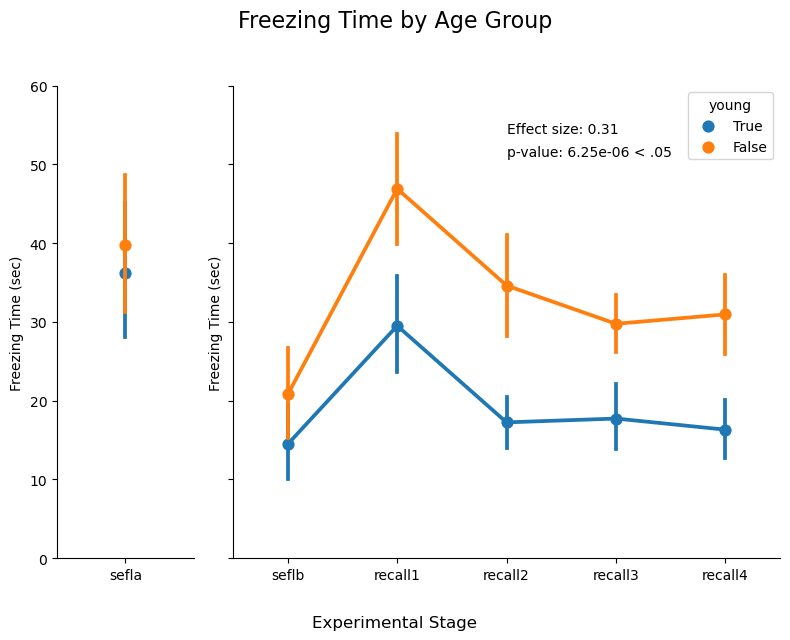

In [46]:
#figure 2b

plot_freezing_time(
    sefla_data=sefla_data,
    subset_data=subset_data,
    effect_size=0.312284,
    pvalue=6.249053e-06,
    title_text='Age Group',
    hue='young',
    output_filename='figure_2b_freezing_age.svg'
)


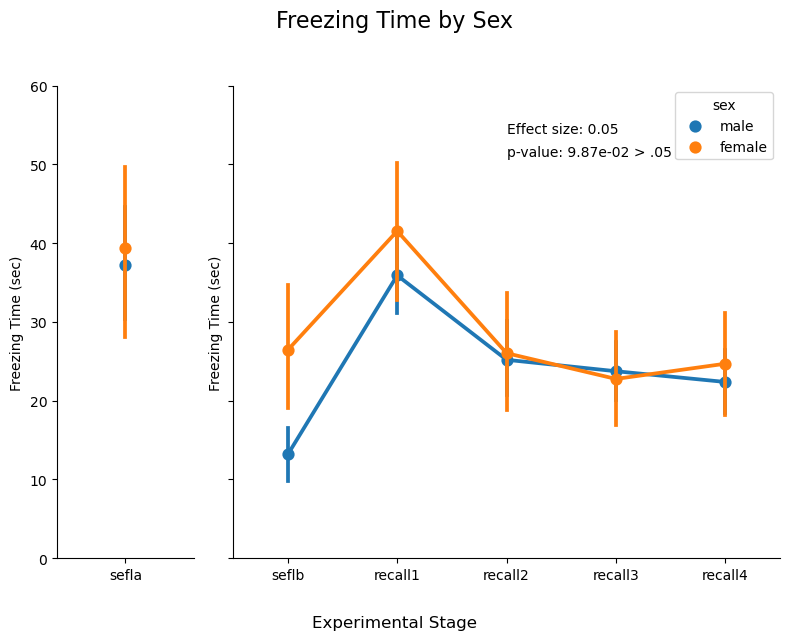

In [47]:
#figure 2c

plot_freezing_time(
    sefla_data=sefla_data,
    subset_data=subset_data,
    effect_size=0.048790,
    pvalue=9.870660e-02,
    title_text='Sex',
    hue='sex',
    output_filename='figure_2c_freezing_sex.svg'
)


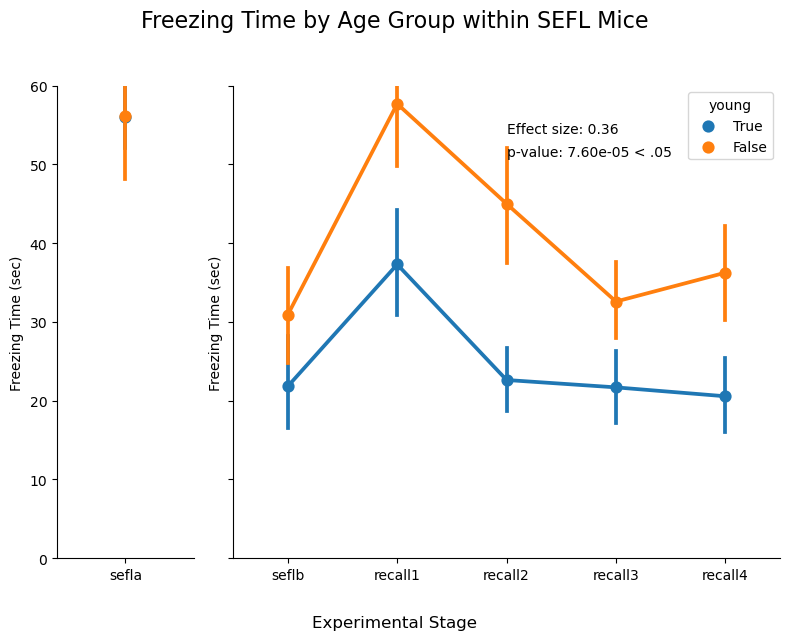

In [48]:
#figure 3a

plot_freezing_time(
    sefla_data=experimental_group_sefla,
    subset_data=experimental_group,
    effect_size=0.356433,
    pvalue=7.599005e-05,
    title_text='Age Group within SEFL Mice',
    hue='young',
    output_filename='figure_3a_freezing_age_sefl.svg'
)


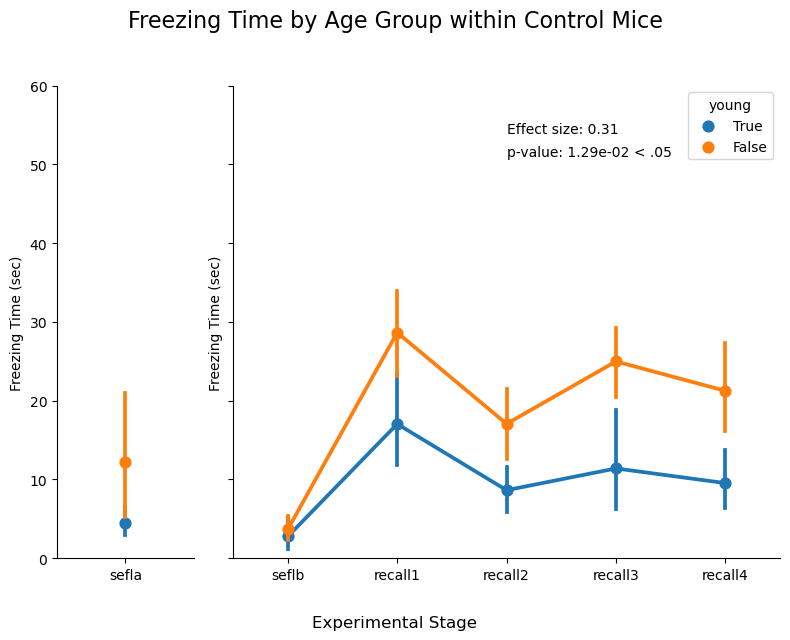

In [49]:
#figure 3b

plot_freezing_time(
    sefla_data=control_group_sefla,
    subset_data=control_group,
    effect_size=0.312203,
    pvalue=1.289142e-02,
    title_text='Age Group within Control Mice',
    hue='young',
    output_filename='figure_3b_freezing_age_control.svg'
)


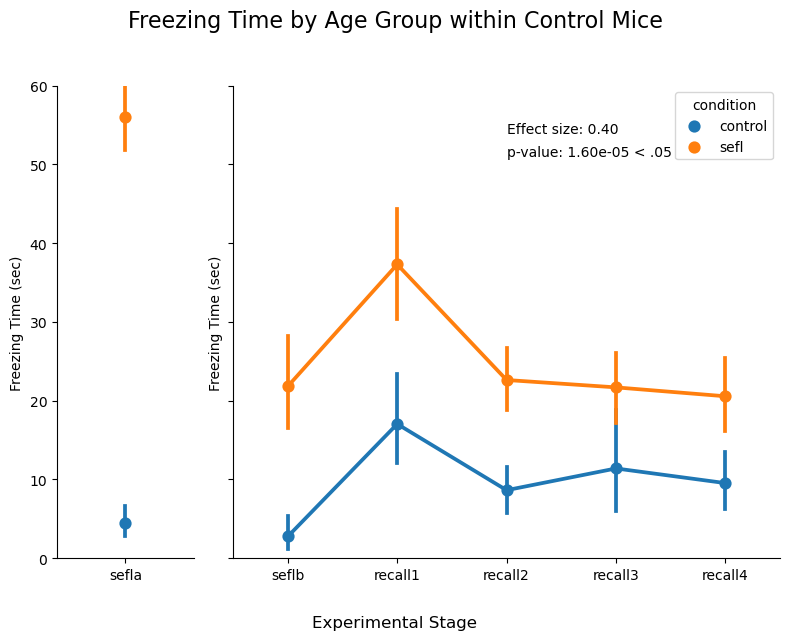

In [52]:
#figure 3c

plot_freezing_time(
    sefla_data=young_data_sefla,
    subset_data=young_data,
    effect_size=0.399364,
    pvalue=1.596238e-05,
    title_text='Conditions within Young Mice',
    hue='condition',
    output_filename='figure_3c_freezing_condition_young.svg'
)


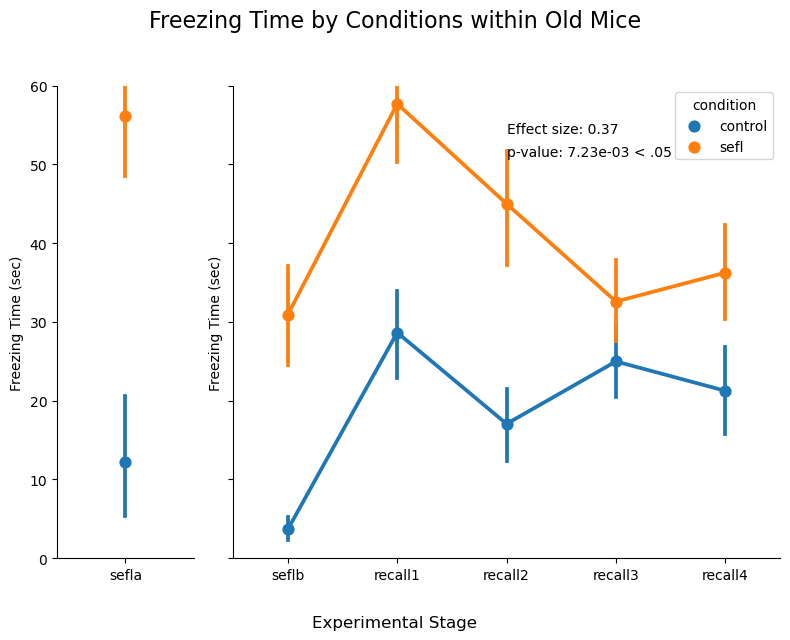

In [53]:
#figure 3d

plot_freezing_time(
    sefla_data=old_data_sefla,
    subset_data=old_data,
    effect_size=0.371648,
    pvalue=7.230362e-03,
    title_text='Conditions within Old Mice',
    hue='condition',
    output_filename='figure_3d_freezing_condition_old.svg'
)


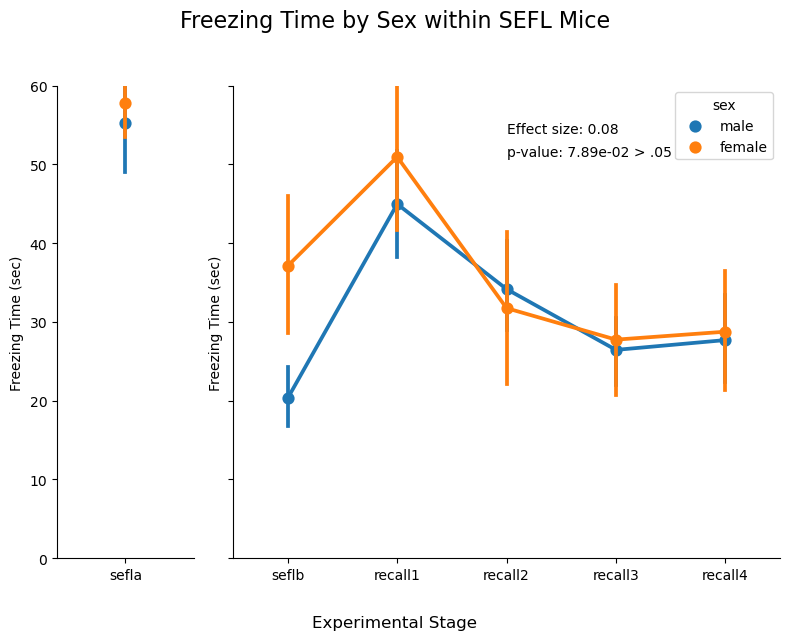

In [54]:
#figure 4a 

plot_freezing_time(
    sefla_data=experimental_group_sefla,
    subset_data=experimental_group,
    effect_size=0.083276,
    pvalue=7.890522e-02,
    title_text='Sex within SEFL Mice',
    hue='sex',
    output_filename='figure_4a_freezing_sex_sefl.svg'
)


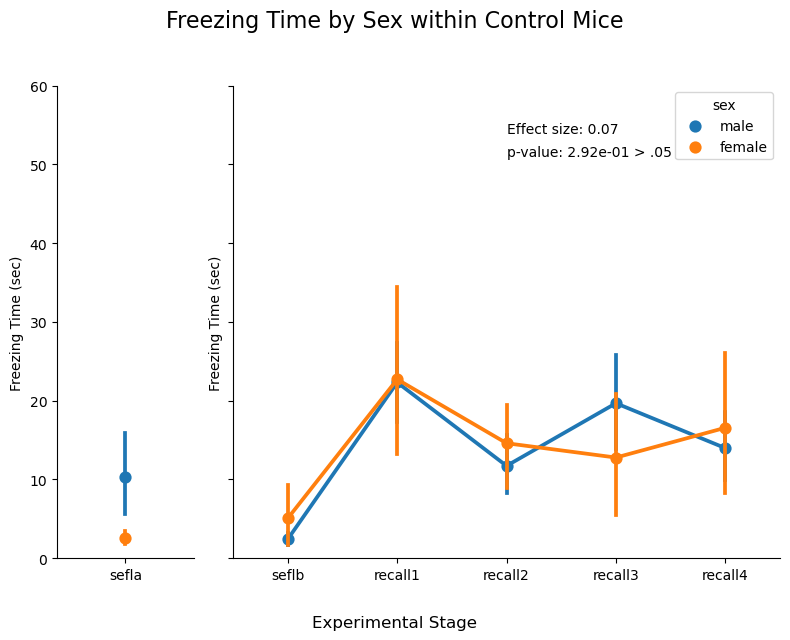

In [55]:
#figure 4b

plot_freezing_time(
    sefla_data=control_group_sefla,
    subset_data=control_group,
    effect_size=0.065058,
    pvalue=2.919367e-01,
    title_text='Sex within Control Mice',
    hue='sex',
    output_filename='figure_4b_freezing_sex_control.svg'
)


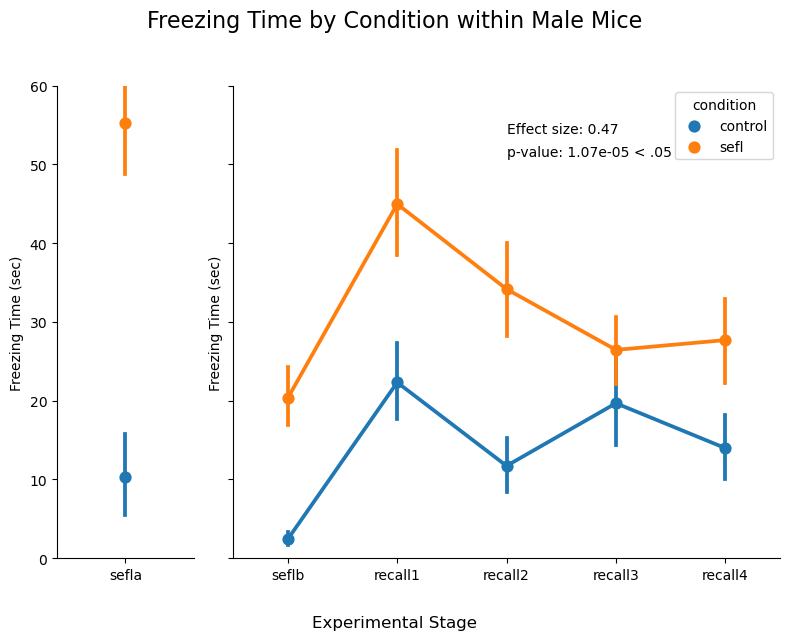

In [57]:
#figure 4c

plot_freezing_time(
    sefla_data=male_data_sefla,
    subset_data=male_data,
    effect_size=0.470053,
    pvalue=1.067778e-05,
    title_text='Condition within Male Mice',
    hue='condition',
    output_filename='figure_4c_freezing_condition_male.svg'
)


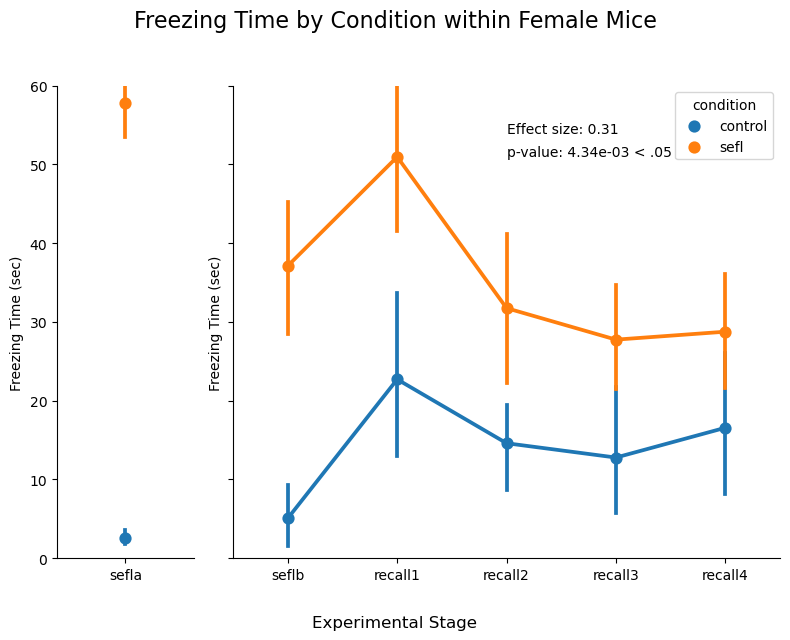

In [59]:
#figure 4d

plot_freezing_time(
    sefla_data=female_data_sefla,
    subset_data=female_data,
    effect_size=0.314840,
    pvalue=4.336248e-03,
    title_text='Condition within Female Mice',
    hue='condition',
    output_filename='figure_4d_freezing_condition_female.svg'
)


/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/novak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

Text(0.5, 1, 'Kernel Density Estimation Freezing vs. Age by Sex')

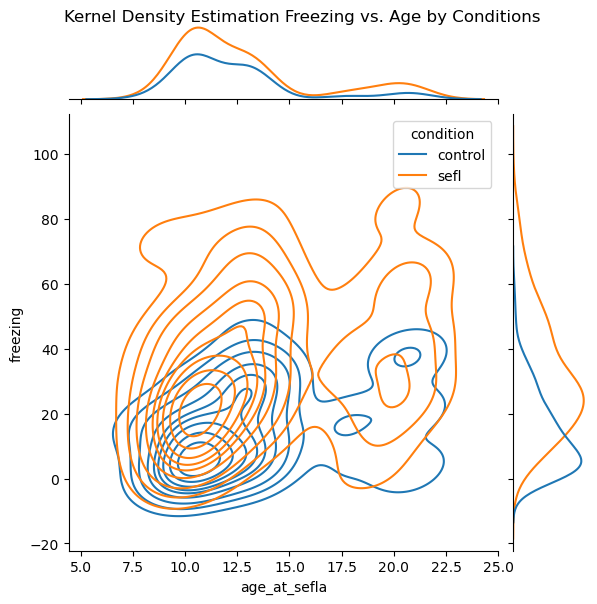

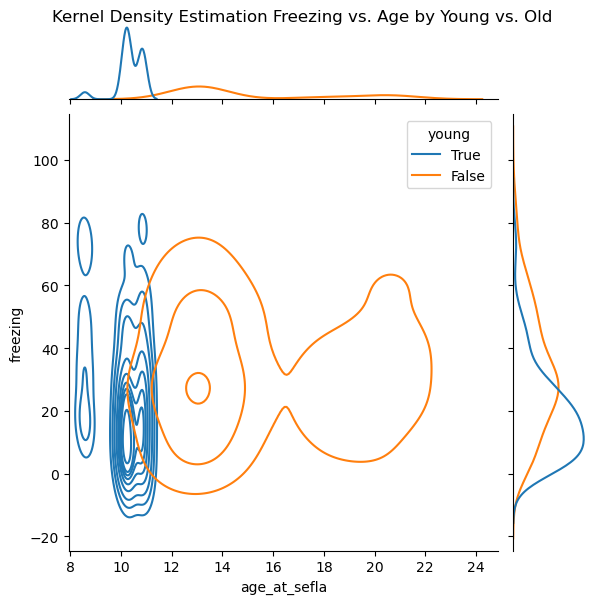

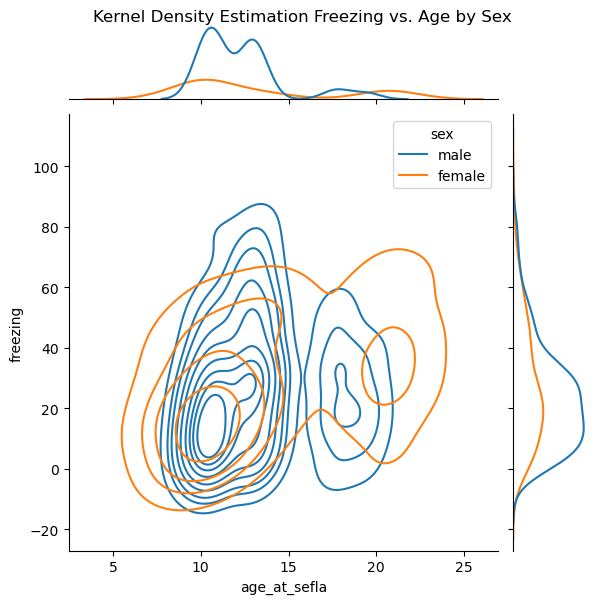

In [22]:
# additional plots 
sns.jointplot(
    data=subset_data,
    x="age_at_sefla", y="freezing", hue="condition",
    kind="kde"
)
plt.suptitle('Kernel Density Estimation Freezing vs. Age by Conditions', y=1)

sns.jointplot(
    data=subset_data,
    x="age_at_sefla", y="freezing", hue="young",
    kind="kde"
)
plt.suptitle('Kernel Density Estimation Freezing vs. Age by Young vs. Old', y=1)

sns.jointplot(
    data=subset_data,
    x="age_at_sefla", y="freezing", hue="sex",
    kind="kde"
)
plt.suptitle('Kernel Density Estimation Freezing vs. Age by Sex', y=1)
